<a href="https://colab.research.google.com/github/PDurgaAnusha/dl-lab/blob/main/Exercise_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install keras


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from subprocess import check_output
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [7]:
prices_dataset =  pd.read_csv('prices.csv',header=0)
prices_dataset

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [12]:
# Filter rows where the symbol is 'YHOO'
yahoo = prices_dataset[prices_dataset['symbol'] == 'YHOO']

# Extract the 'close' prices and convert to float32
yahoo_stock_prices = yahoo['close'].values.astype('float32')

# Reshape the array to (784, 1)
yahoo_stock_prices = yahoo_stock_prices.reshape(-1, 1)

# Check the shape of the resulting array
print(yahoo_stock_prices.shape)

(1762, 1)


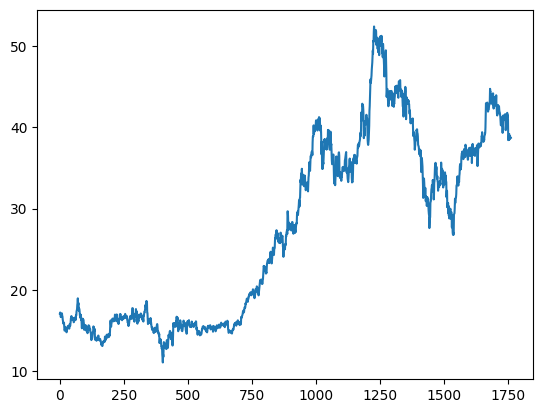

In [13]:
plt.plot(yahoo_stock_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
yahoo_stock_prices = scaler.fit_transform(yahoo_stock_prices)

In [25]:
# convert an array of values into a dataset matrix
# Assuming 'train' and 'test' are your time series datasets
# Make sure to replace this with your actual data loading process

# Example:
import numpy as np

# Define or load your training and testing datasets
# For example, using NumPy arrays
train_data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
test_data = np.array([100, 110, 120, 130, 140])

# Define the create_dataset function
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        x = dataset[i:(i+look_back)]
        y = dataset[i + look_back]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

# Use the create_dataset function
look_back = 1
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Display the results
print("TrainX:", trainX)
print("TrainY:", trainY)
print("TestX:", testX)
print("TestY:", testY)


TrainX: [[10]
 [20]
 [30]
 [40]
 [50]
 [60]
 [70]
 [80]]
TrainY: [20 30 40 50 60 70 80 90]
TestX: [[100]
 [110]
 [120]
 [130]]
TestY: [110 120 130 140]


In [26]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [27]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.018161773681640625


In [28]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=10,
    validation_split=0.05)

1/1 [==============================] - 6s 6s/step - loss: 2901.2068 - val_loss: 8080.3613
Epoch 2/10
1/1 [==============================] - 0s 42ms/step - loss: 2888.5247 - val_loss: 8063.8516
Epoch 3/10
1/1 [==============================] - 0s 43ms/step - loss: 2883.4275 - val_loss: 8050.4468
Epoch 4/10
1/1 [==============================] - 0s 41ms/step - loss: 2869.6965 - val_loss: 8035.9697
Epoch 5/10
1/1 [==============================] - 0s 40ms/step - loss: 2865.8672 - val_loss: 8022.3325
Epoch 6/10
1/1 [==============================] - 0s 41ms/step - loss: 2860.5833 - val_loss: 8009.4429
Epoch 7/10
1/1 [==============================] - 0s 45ms/step - loss: 2850.9749 - val_loss: 7994.5786
Epoch 8/10
1/1 [==============================] - 0s 44ms/step - loss: 2842.2124 - val_loss: 7978.9771
Epoch 9/10
1/1 [==============================] - 0s 42ms/step - loss: 2827.5664 - val_loss: 7961.2910
Epoch 10/10
1/1 [==============================] - 0s 43ms/step - loss: 2818.0994 - va

1/1 [==============================] - 0s 23ms/step
[[0.8700438]]
1/1 [==============================] - 0s 23ms/step
[[1.1731899]]
1/1 [==============================] - 0s 21ms/step
[[1.3960545]]
1/1 [==============================] - 0s 22ms/step
[[1.5276425]]
1/1 [==============================] - 0s 24ms/step
[[1.6010331]]
1/1 [==============================] - 0s 25ms/step
[[47.00541 ]
 [59.51928 ]
 [68.71913 ]
 [74.151085]
 [77.18064 ]]


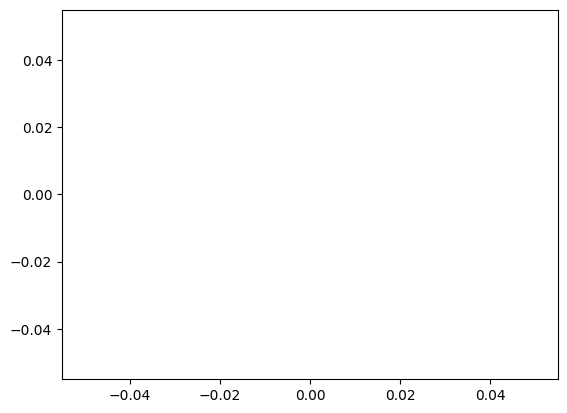

In [30]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue

    for i in range(length):
        predicted = []

        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])

        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)

        prediction_seqs.append(predicted[-1])

    return prediction_seqs

predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)